# Exercício 2: Mínimos Quadrados

O calor específico de um material é uma quantidade que informa a quantidade de energia necessária para que um material com uma unidade de matéria aumente a temperatura em uma unidade. Por exemplo, o calor específico da água a uma temperatura de 18 °C (~291 K), com pressão constante é de $C=4180 J/(kg.K)$. Ou seja, para aumentar em 1 K, um volume de 1 kg de água seriam necessário fornecer 4180 J de energia.

Para um metal, quando a temperatura está muito baixa, próximo do 0 absoluto, a equação para o calor específico, em função da temperatura, é dada por:

\begin{equation}
C = aT + bT^3
\label{eq:calor_especifico} \tag{1}
\end{equation}

onde a e b são constantes que dependem do material.

O arquivo "dados2.txt" contém dados simulados de um experimento de calor específico para o cobre em baixas temperaturas. A primeira coluna é a temperatura em Kelvins, a segunda coluna é o calor específico em Joules, e a terceira coluna é a incerteza do calor específico, em Joules.

## Solução do Exercício de Mínimos Quadrados

O objetivo de mínimos quadrados é obter os melhores parâmetros de uma específica função de forma que a curva mais se aproxime dos dados.

Supomos um conjunto de dados ($x_i$, $y_i$) que queremos ajustar por uma função linear qualquer $f(x)$

Definimos como erro do experimento $i$, $e_i$, a diferença entre o valor determinado pelo experimento $y_i$ e pelo valor aplicado na função $f(x_i)$

\begin{equation}
e_i = f(x_i) - y_i \tag{2}
\end{equation}

Ao escolher o melhor conjunto de parâmetros, queremos que o erro total seja o menor possível. Para isso precisamos minimizar o erro total. Infelizmente, a simples soma dos erros não fornece a melhor função para ser minimizada, pois ela gera um conjunto grande de possíveis soluções. O módulo do erro também não é uma função boa para ser ajustada porque não é uma função contínua. Portanto, a função a ser minimizada será a soma dos quadrados dos erros:

\begin{equation}
E = \sum_i e_i^2 \tag{3}
\end{equation}

## Exemplo de ajuste por uma linha

A função a ser ajustada está apresentada na função (1). Logo, os parâmetros a serem determinados são os parâmetros $a$ e $b$.

Para obter os valores mínimos derivamos a equação (3) em relação aos parâmetros de ajuste $a$ e $b$.

$$\frac{\partial E}{\partial a} = 0 \tag{4}$$
$$\frac{\partial E}{\partial b} = 0 \tag{5}$$

Vamos primeiramente realizar a derivada da equação (4)

$$\frac{\partial E}{\partial a} = \sum_{i}\frac{\partial (e_i^2)}{\partial a} = \sum_{i}2e_i\frac{\partial e_i}{\partial a} = \sum_{i}2e_i\frac{\partial f(T_i)}{\partial a} = \sum_{i}2e_iT_i = \sum_{i}2[f(T_i) - y_i]T_i = \sum_{i}2(aT_i^2 + bT^4 - y_iT_i) \tag{6}$$

Em seguida derivamos a equação (5)

$$\frac{\partial E}{\partial b} = \sum_{i}\frac{\partial (e_i^2)}{\partial b} = \sum_{i}2e_i\frac{\partial e_i}{\partial b} = \sum_{i}2e_i\frac{\partial f(T_i)}{\partial b} = \sum_{i}2e_iT_i^3 = \sum_{i}2[f(T_i) - y_i]T_i^3 = \sum_{i}2(aT_i^4 + bT^6 - y_iT_i^3) \tag{7}$$

Agora igualamos as derivadas obtidas nas equações (6) e (7) por zero, como mostrado nas equações (4) e (5)

\begin{equation}
\begin{matrix}
\sum_{i}2(aT_i^2 + bT^4 - y_iT_i) = 0\\
\sum_{i}2(aT_i^4 + bT^6 - y_iT_i^3) = 0
\end{matrix}
\end{equation}

que simplificamos para:

\begin{equation}
\begin{matrix}
a\sum_{i}T_i^2 + b\sum_{i}T^4 = \sum_{i}y_iT_i\\
a\sum_{i}T_i^4 + b\sum_{i}T^6 = \sum_{i}y_iT_i^3
\end{matrix} \tag{8}
\end{equation}

Para simplificar a notação, vamos substituir os somatórios por:

$$S_{T2} = \sum_{i}T_i^2$$
$$S_{T4} = \sum_{i}T^4$$
$$S_{T6} = \sum_{i}T^6$$
$$S_{yT} = \sum_{i}y_iT_i$$
$$S_{yT3} = \sum_{i}y_iT_i^3 \tag{9}$$

Assim a equação 8 fica:

\begin{equation}
\begin{matrix}
aS_{T2} + bS_{T4} = S_{yT}\\
aS_{T4} + bS_{T6} = S_{yT3}
\end{matrix} \tag{10}
\end{equation}

## Parâmetros do melhor ajuste

Finalmente, para obter os melhores parâmetros basta obter os valores de $a$ e $b$ no sistema de equações lineares dado na equação (10).

Para obter $a$ vamos eliminar $b$ multiplicando a primeira equação de (10) por $S_{T6}$ e a segunda equação por $-S_{T4}$.

\begin{equation}
\begin{matrix}
aS_{T2}S_{T6} + bS_{T4}S_{T6} = S_{yT}S_{T6}\\
-aS_{T4}^2 - bS_{T6}S_{T4} = -S_{yT3}S_{T4}
\end{matrix} \tag{11}
\end{equation}

Agora somamos as duas equações de (11) e separamos $a$

$$aS_{T2}S_{T6} - aS_{T4}^2 = S_{yT}S_{T6} - S_{yT3}S_{T4}$$
$$a = \frac{S_{yT}S_{T6} - S_{yT3}S_{T4}}{S_{T2}S_{T6} - S_{T4}^2} \tag{12}$$

Fazendo procedimento semelhante obtemos o valor de $b$:

$$b = \frac{S_{yT3}S_{T2} - S_{yT}S_{T4}}{S_{T2}S_{T6} - S_{T4}^2} \tag{13}$$

## Considerando a incerteza dos parâmetros

As medidas de um experimento possuem incertezas. Quando fazemos um ajuste, queremos que a curva passe mais próxima dos pontos com menor incerteza. Para considerar esta incerteza defnimos o chamado chi-quadrado $\chi^2$, que nada mais é do que a equação (3) onde cada erro ao quadrado é dividido pela incerteza ao quadrado.

$$\chi^2 = \sum_i\frac{e_i^2}{\sigma_i^2} \tag{14}$$

Ao derivarmos a equação (14) pelos parâmetros como feito acima, obtemos o mesmo resultado, porém a equação (9) vira:

$$S_{T2} = \sum_i\frac{T_i^2}{\sigma^2}$$
$$S_{T4} = \sum_i\frac{T_i^4}{\sigma_i^2}$$
$$S_{T6} = \sum_i\frac{T_i^6}{\sigma_i^2}$$
$$S_{yT} = \sum_i\frac{y_iT_i}{\sigma_i^2}$$
$$S_{yT3} = \sum_i\frac{y_iT_i^3}{\sigma_i^2} \tag{15}$$

E o resultado final é a mesma equação:

$$a = \frac{S_{yT}S_{T6} - S_{yT3}S_{T4}}{S_{T2}S_{T6} - S_{T4}^2}$$

$$b = \frac{S_{yT3}S_{T2} - S_{yT}S_{T4}}{S_{T2}S_{T6} - S_{T4}^2}$$

## Obtendo as incertezas dos parâmetros ajustados

Para terminar, sabemos que as medidas possuem incertezas associadas aos experimentos e queremos saber como essas incertezas podem ser propagadas para os parâmetros ajustados. Infelizmente, é extremamente complicado considerar as barras de erro nas duas variáveis, não existindo uma solução pré-determinada. Porém, se considerarmos a incerteza apenas na variável dependente, o procedimento se torna mais simples.

Devemos lembrar que a equação de propagação de erro é:

$$\sigma_f^2 = \left(\frac{\partial f}{\partial a_1} \right)^2\sigma_{a_1}^2 + \left(\frac{\partial f}{\partial a_2} \right)^2\sigma_{a_2}^2 + \cdot\cdot\cdot + \left(\frac{\partial f}{\partial a_n} \right)^2\sigma_{a_n}^2 = \sum_i\left(\frac{\partial f}{\partial a_i} \right)^2\sigma_{a_i}^2$$

Aplicando essa equação para $a$ e para $b$ supondo que os erros ocorrem apenas em $y$, temos que:

$$\sigma_a^2 = \sum_i\left(\frac{\partial a}{\partial y_i} \right)^2\sigma_i^2 \tag{16}$$
$$\sigma_b^2 = \sum_i\left(\frac{\partial b}{\partial y_i} \right)^2\sigma_i^2 \tag{17}$$

Primeiramente, vamos obter a derivada de $a$ em relação a $y_i$:

$$\frac{\partial a}{\partial y_i} = \frac{\partial}{\partial y_i}\left(\frac{S_{yT}S_{T6} - S_{yT3}S_{T4}}{S_{T2}S_{T6} - S_{T4}^2} \right)$$
$$\frac{\partial a}{\partial y_i} = \frac{1}{S_{T2}S_{T6} - S_{T4}^2}\frac{\partial}{\partial y_i}\left(S_{yT}S_{T6} - S_{yT3}S_{T4}\right)$$
$$\frac{\partial a}{\partial y_i} = \frac{1}{S_{T2}S_{T6} - S_{T4}^2}\left(S_{T6}\frac{\partial S_{yT}}{\partial y_i} - S_{T4}\frac{\partial S_{yT3}}{\partial y_i}\right) \tag{18}$$

Substituindo na equação (18) os valores de $S_{yT}$ e $S_{yT3}$ dados na equação (15) obtemos o resultado da derivada

$$\frac{\partial a}{\partial y_i} = \frac{1}{S_{T2}S_{T6} - S_{T4}^2}\left(\frac{S_{T6}T_i}{\sigma_i^2} - \frac{S_{T4}T_i^3}{\sigma_i^2}\right)$$
$$\frac{\partial a}{\partial y_i} = \frac{1}{\sigma_i^2}\left(\frac{S_{T6}T_i - S_{T4}T_i^3}{S_{T2}S_{T6} - S_{T4}^2}\right) \tag{19}$$

Substituindo a equação (19) na equação (16) obtemos:

$$\sigma_a^2 = \sum_i\left[\frac{1}{\sigma_i^2}\left(\frac{S_{T6}T_i - S_{T4}T_i^3}{S_{T2}S_{T6} - S_{T4}^2}\right) \right]^2\sigma_i^2$$
$$\sigma_a^2 = \sum_i\frac{1}{\sigma_i^2}\frac{(S_{T6}T_i - S_{T4}T_i^3)^2}{(S_{T2}S_{T6} - S_{T4}^2)^2}$$
$$\sigma_a^2 = \frac{1}{(S_{T2}S_{T6} - S_{T4}^2)^2}\sum_i\frac{1}{\sigma_i^2}(S_{T6}^2T_i^2 - 2S_{T6}T_iS_{T4}T_i^3 + S_{T4}^2T_i^6)$$
$$\sigma_a^2 = \frac{1}{(S_{T2}S_{T6} - S_{T4}^2)^2}\left(S_{T6}^2 \sum_i\frac{T_i^2}{\sigma_i^2}- 2S_{T6}S_{T4}\sum_i\frac{T_i^4}{\sigma_i^2} + S_{T4}^2\sum_i\frac{T_i^6}{\sigma_i^2}\right)$$
$$\sigma_a^2 = \frac{1}{(S_{T2}S_{T6} - S_{T4}^2)^2}\left(S_{T6}^2 S_{T2} - 2S_{T6}S_{T4}^2 + S_{T4}^2S_{T6}\right)$$
$$\sigma_a^2 = \frac{1}{(S_{T2}S_{T6} - S_{T4}^2)^2}\left(S_{T6}^2 S_{T2} - S_{T4}^2S_{T6}\right)$$
$$\sigma_a^2 = \frac{1}{(S_{T2}S_{T6} - S_{T4}^2)^2}S_{T6}\left(S_{T6} S_{T2} - S_{T4}^2\right)$$
$$\sigma_a^2 = \frac{S_{T6}}{(S_{T2}S_{T6} - S_{T4}^2)} \tag{20}$$

Fazendo o mesmo procedimento para (b) temos:

$$\sigma_b^2 = \frac{S_{T2}}{(S_{T2}S_{T6} - S_{T4}^2)} \tag{21}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t, y, sigmay = np.loadtxt('dados2.txt', unpack=True)

In [3]:
st2 = np.sum(t**2/(sigmay**2))
st4 = np.sum(t**4/(sigmay**2))
st6 = np.sum(t**6/(sigmay**2))
syt = np.sum(y*t/(sigmay**2))
syt3 = np.sum(y*(t**3)/(sigmay**2))

In [4]:
delta = st6*st2 - st4**2

In [5]:
a = (syt*st6 - syt3*st4)/delta
b = (syt3*st2 - syt*st4)/delta

In [6]:
sa = np.sqrt(st6/delta)
sb = np.sqrt(st2/delta)

In [7]:
print(a, b)

0.01084694046197205 0.0008595358028786201


In [8]:
print(sa, sb)

0.0007249594043212005 5.470784756661708e-05


In [9]:
T = np.linspace(0.5, 7, 100)
C = a*T + b*(T**3)

Text(0, 0.5, 'Calor específico J/(kg.K)')

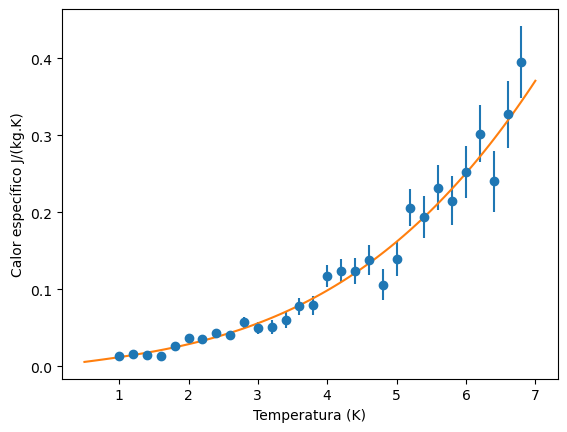

In [10]:
plt.errorbar(t, y, yerr=sigmay, fmt='o')
plt.plot(T, C)
plt.xlabel('Temperatura (K)')
plt.ylabel('Calor específico J/(kg.K)')

Os valores finais são:

$$a = 0.0108 \pm 0.0007~J/(kg.K^2)$$
$$b = 0.00086 \pm 0.00005~J/(kg.K^4)$$